<a href="https://colab.research.google.com/github/JohnNun/pneumonia_identification_project/blob/main/pneumonia_identification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Identification Project

# Business and Data Understanding


# Data preparation

In [1]:
# For Google Colab only
!pip install keras
!pip install keras_preprocessing
!pip install tensorflow
!pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [2]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [3]:
# Following code taken from stackoverflow user fdsig
import json
import os
from pathlib import Path

# your api key
api_key = {
'username':"" ,
'key':""}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)

In [4]:
# Downloading and Importing images
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [5]:
# Linking directory path
train_data_dir = 'chest_xray/train'
val_data_dir = 'chest_xray/val'

In [6]:
# Getting train and validation data from directory
test_generator = ImageDataGenerator().flow_from_directory(val_data_dir, target_size=(150,150), batch_size=16, seed=42)
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(150,150), batch_size=652, seed=42)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [7]:
# Creating datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [8]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(652, 150, 150, 3)
(652, 2)
(16, 150, 150, 3)
(16, 2)


In [9]:
# Reshaping data
train_img_unrow = train_images.reshape(652, -1)
test_img_unrow = test_images.reshape(16, -1)

In [10]:
# Normalizing data
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

# Modeling

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

In [12]:
# Function to quickly plot model results
def plot_results(model_results):
    """
    This function will take in the results of a model and plot the loss and accuracy of the model.

    Args:
    model_results (list): the results of the model in [] brackets.
    """
    for results in model_results:
        train_loss = results.history['loss']
        train_acc = results.history['accuracy']
        val_loss = results.history['val_loss']
        val_acc = results.history['val_accuracy']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
        sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

        sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
        sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
        ax1.set_title('Loss')
        ax2.set_title('Accuracy')
        ax1.legend();

In [13]:
model_1 = Sequential()

In [14]:
model_1.add(layers.Input(shape=(67500,)))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

In [15]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_1_results = model_1.fit(train_img_final, train_labels, epochs=10, batch_size=20, validation_data=(test_img_final, test_labels))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6444 - loss: 2.3719 - val_accuracy: 0.6250 - val_loss: 0.7931
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.3431 - val_accuracy: 0.6250 - val_loss: 0.8656
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8905 - loss: 0.2468 - val_accuracy: 0.6875 - val_loss: 0.5891
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8371 - loss: 0.3603 - val_accuracy: 0.6875 - val_loss: 0.6046
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9391 - loss: 0.1569 - val_accuracy: 0.9375 - val_loss: 0.2870
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9240 - loss: 0.1725 - val_accuracy: 0.7500 - val_loss: 0.2879
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8896 - loss: 0.2388 - val_accuracy: 0.6875 - val_loss: 0.5544
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9601 - loss: 0.1117 - val_accuracy: 0.9375 - val_loss

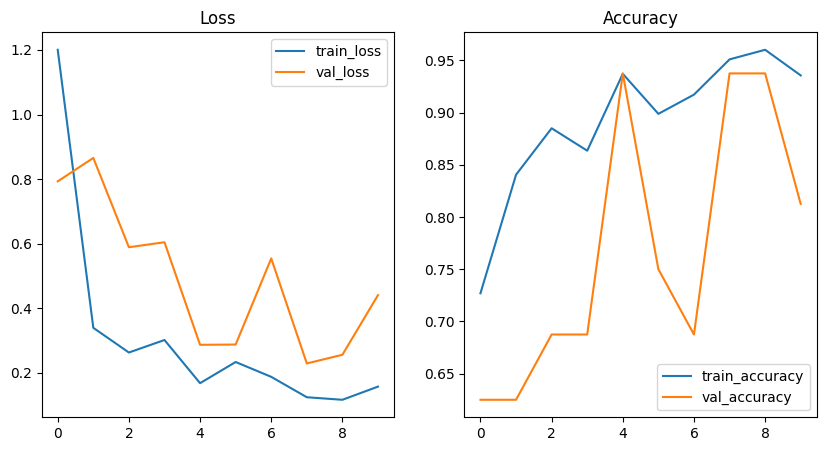

In [17]:
plot_results([model_1_results])

In [18]:
model_2 = Sequential()

In [19]:
model_2.add(layers.Input(shape=(67500,)))
model_2.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.05)))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

In [20]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model_2_results = model_2.fit(train_img_final, train_labels, epochs=50, batch_size=100, validation_data=(test_img_final, test_labels))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.6878 - loss: 8.2509 - val_accuracy: 0.5000 - val_loss: 6.8548
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5432 - loss: 5.1777 - val_accuracy: 0.5625 - val_loss: 4.0274
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7569 - loss: 3.0832 - val_accuracy: 0.5625 - val_loss: 4.0170
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7836 - loss: 2.8168 - val_accuracy: 0.5625 - val_loss: 3.2698
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8368 - loss: 2.4024 - val_accuracy: 0.6250 - val_loss: 2.7702
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8212 - loss: 2.2004 - val_accuracy: 0.5000 - val_loss: 4.1670
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7696 - loss: 2.2371 - val_accuracy: 0.8125 - val_loss: 1.8234
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8749 - loss: 1.7248 - val_accuracy: 0.6875 - val_loss: 2.2386

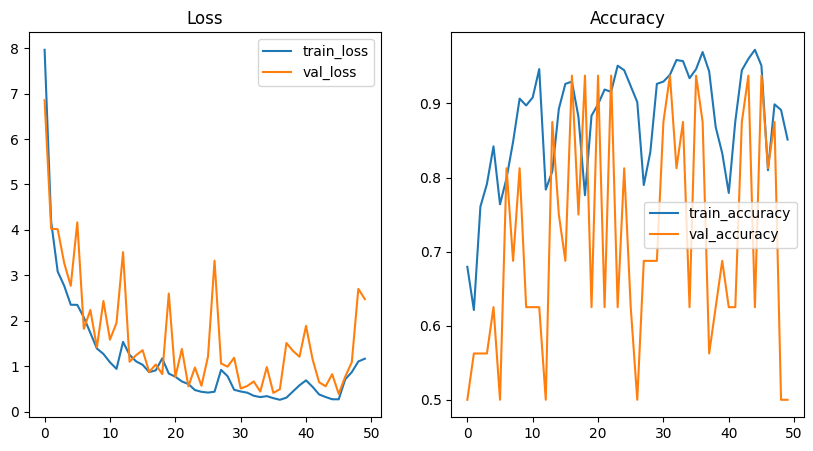

In [22]:
plot_results([model_2_results])

In [23]:
model_3 = Sequential()

In [24]:
model_3.add(layers.Input(shape=(67500,)))
model_3.add(Dense(100, activation='relu', kernel_regularizer=l2(l2=0.05)))
model_3.add(Dense(50, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(25, activation='relu'))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(2, activation='softmax'))

In [25]:
model_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
model_3_results = model_3.fit(train_img_final, train_labels, epochs=100, batch_size=300, validation_data=(test_img_final, test_labels), callbacks=[early_stop])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7001 - loss: 10.6241 - val_accuracy: 0.5000 - val_loss: 10.6517
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7204 - loss: 10.5444 - val_accuracy: 0.5000 - val_loss: 10.7430
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7295 - loss: 10.4770 - val_accuracy: 0.5000 - val_loss: 10.5163
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7199 - loss: 10.3799 - val_accuracy: 0.5000 - val_loss: 10.5695
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7221 - loss: 10.3486 - val_accuracy: 0.5000 - val_loss: 10.3445
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7187 - loss: 10.2870 - val_accuracy: 0.5000 - val_loss: 10.5616
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7174 - loss: 10.2630 - val_accuracy: 0.5000 - val_loss: 10.2870
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7236 - loss: 10.1335 - val_accuracy: 0.500

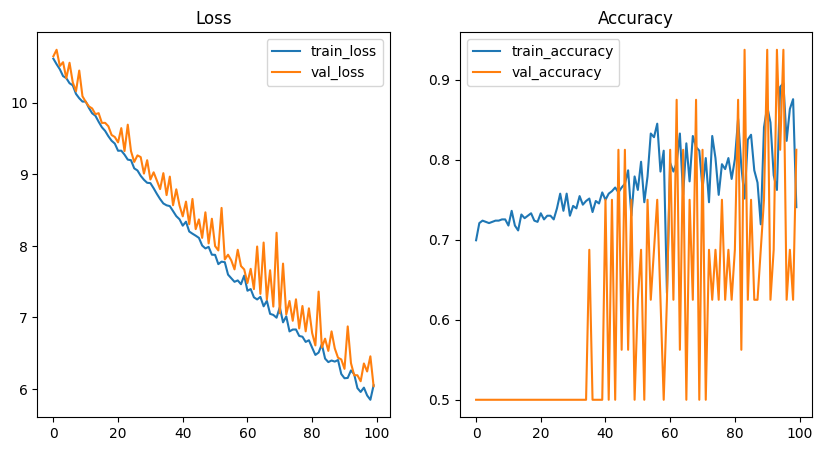

In [28]:
plot_results([model_3_results])

In [29]:
model_4 = Sequential()

In [30]:
model_4.add(layers.Input(shape=(67500,)))
model_4.add(Dense(100, activation='relu', kernel_regularizer=l2(l2=0.1)))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(25, activation='relu'))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dense(2, activation='softmax'))

In [31]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model_4_results = model_4.fit(train_img_final, train_labels, epochs=100, batch_size=300, validation_data=(test_img_final, test_labels), callbacks=[early_stop])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 740ms/step - accuracy: 0.4617 - loss: 20.3686 - val_accuracy: 0.5000 - val_loss: 16.0110
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7220 - loss: 14.9263 - val_accuracy: 0.5625 - val_loss: 11.8292
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7541 - loss: 11.4251 - val_accuracy: 0.6875 - val_loss: 9.4135
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8174 - loss: 9.0598 - val_accuracy: 0.6875 - val_loss: 7.7414
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8250 - loss: 7.4052 - val_accuracy: 0.5625 - val_loss: 6.4039
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8117 - loss: 5.9563 - val_accuracy: 0.5000 - val_loss: 6.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7194 - loss: 5.3393 - val_accuracy: 0.6250 - val_loss: 4.0877
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5925 - loss: 3.9722 - val_accuracy: 0.6250 - val

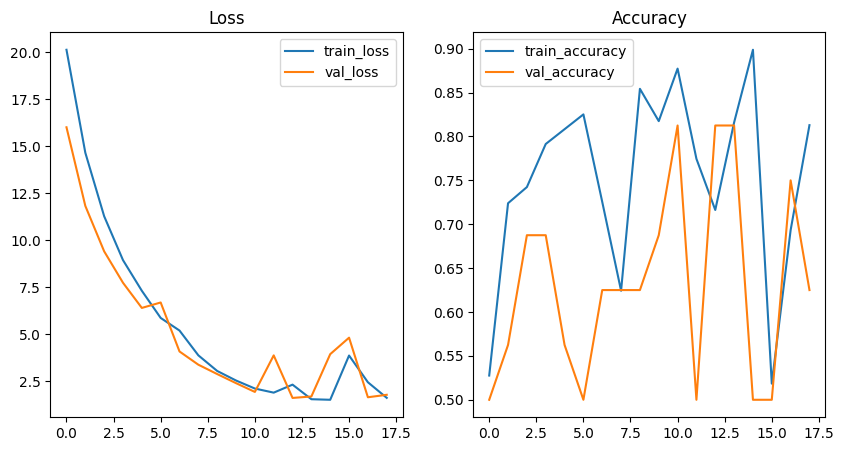

In [33]:
plot_results([model_4_results])

# Evaluation